## ML Project: Ensemble Learning Model to Predict whether a driver finishes in the Top 3

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [4]:
drivers = pd.read_csv('D:\\MLProjects_Datasets\\drivers.csv')
constructors = pd.read_csv('D:\\MLProjects_Datasets\\constructors.csv')
races = pd.read_csv('D:\\MLProjects_Datasets\\races.csv')
results = pd.read_csv('D:\\MLProjects_Datasets\\results.csv')

In [5]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


In [6]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [7]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [8]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26494,26500,1131,822,15,77,18,16,16,16,0.0,70,\N,\N,48,19,1:10.449,220.653,11
26495,26501,1131,855,15,24,20,17,17,17,0.0,70,\N,\N,54,20,1:10.470,220.587,11
26496,26502,1131,4,117,14,15,18,18,18,0.0,70,\N,\N,70,1,1:07.694,229.633,11
26497,26503,1131,858,3,2,19,19,19,19,0.0,69,\N,\N,60,17,1:10.406,220.788,12


In [9]:
df = results.merge(drivers, on='driverId', how='left') \
            .merge(constructors, on='constructorId', how='left') \
            .merge(races, on='raceId', how='left')

In [10]:
df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26494,26500,1131,822,15,77,18,16,16,16,0.0,...,2024-06-28,10:30:00,2024-06-28,14:30:00,\N,\N,2024-06-29,14:00:00,2024-06-29,10:00:00
26495,26501,1131,855,15,24,20,17,17,17,0.0,...,2024-06-28,10:30:00,2024-06-28,14:30:00,\N,\N,2024-06-29,14:00:00,2024-06-29,10:00:00
26496,26502,1131,4,117,14,15,18,18,18,0.0,...,2024-06-28,10:30:00,2024-06-28,14:30:00,\N,\N,2024-06-29,14:00:00,2024-06-29,10:00:00
26497,26503,1131,858,3,2,19,19,19,19,0.0,...,2024-06-28,10:30:00,2024-06-28,14:30:00,\N,\N,2024-06-29,14:00:00,2024-06-29,10:00:00


In [11]:
df['top3'] = df['positionOrder'].apply(lambda x: 1 if x <= 3 else 0)

In [12]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['race_date'] = pd.to_datetime(df['date'], errors='coerce')

In [13]:
df['driver_age'] = df.apply(lambda row: (row['race_date'] - row['dob']).days // 365 
                            if pd.notnull(row['race_date']) and pd.notnull(row['dob']) else np.nan, axis=1)

In [14]:
df.rename(columns={'name_x': 'Team_name', 'surname': 'Driver_name'}, inplace=True)


In [15]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'Driver_name', 'dob', 'nationality_x', 'url_x',
       'constructorRef', 'Team_name', 'nationality_y', 'url_y', 'year',
       'round', 'circuitId', 'name_y', 'date', 'time_y', 'url', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'top3',
       'race_date', 'driver_age'],
      dtype='object')

In [16]:
selected_features = ['grid', 'driver_age', 'year', 'round', 'Driver_name', 'Team_name', 'points']

In [17]:
df_model = df[selected_features + ['top3']].dropna()

In [18]:
df_model = pd.get_dummies(df_model, columns=['Driver_name', 'Team_name'], drop_first=True)

In [19]:
X = df_model.drop('top3', axis=1)
y = df_model['top3']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
num_cols = ['grid', 'driver_age', 'year', 'round', 'points']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [22]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
nb = GaussianNB()
nb.fit(X_train, y_train)
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

In [23]:
ensemble = VotingClassifier(estimators=[('rf', grid_rf.best_estimator_), ('nb', nb), ('lr', grid_lr.best_estimator_)], voting='hard')

In [24]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('nb', GaussianNB()),
                             ('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=42))])

In [25]:
y_pred = ensemble.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9841509433962264

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4663
           1       0.91      0.96      0.94       637

    accuracy                           0.98      5300
   macro avg       0.95      0.97      0.96      5300
weighted avg       0.98      0.98      0.98      5300



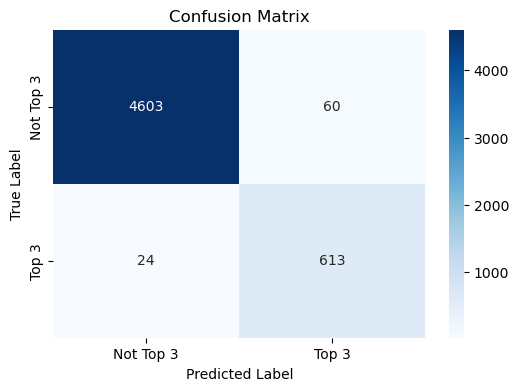

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Top 3", "Top 3"], 
            yticklabels=["Not Top 3", "Top 3"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [65]:
def predict_from_input():
    try:
        grid = int(input("Enter Grid (starting position): "))
        driver_age = int(input("Enter Driver Age: "))
        year = int(input("Enter Race Year (e.g., 2023): "))
        round_val = int(input("Enter Race Round: "))
        points = int(input("Enter Expected number of points: "))
        driver_name = input("Enter Driver Name: ").strip()
        constructor_name = input("Enter Constructor Name: ").strip()

        input_df = pd.DataFrame({
            'grid': [grid],
            'driver_age': [driver_age],
            'year': [year],
            'round': [round_val],
            'points': [points]
        })

        model_columns = X.columns
        temp_df = pd.DataFrame({
            'driver_name_' + driver_name: [1],
            'constructor_name_' + constructor_name: [1],
        })

        input_df = pd.concat([input_df, temp_df], axis=1)

        for col in model_columns:
            if col not in input_df.columns:
                input_df[col] = 0

        input_df = input_df[model_columns]

        input_df[num_cols] = scaler.transform(input_df[num_cols])

        prediction = ensemble.predict(input_df)[0]
        result = "Top 3 Finish" if prediction == 1 else "Not Top 3 Finish"
        print("Prediction:", result)
        
    except Exception as e:
        print("An error occurred:", e)

predict_from_input()


Enter Grid (starting position):  4
Enter Driver Age:  35
Enter Race Year (e.g., 2023):  2020
Enter Race Round:  10
Enter Expected number of points:  12
Enter Driver Name:  Hamilton
Enter Constructor Name:  Mercedes


Prediction: Top 3 Finish
